<a href="https://colab.research.google.com/github/NerminHussein/Traffic-Signal-Detection-Image-Processing/blob/master/trafficSignTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [23]:
import keras,os
import keras as model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [24]:
import cv2


386


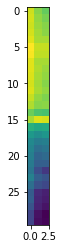

Test Data accuracy:  0.0


In [54]:

import cv2
import os
import numpy as np
import random
import pickle
from PIL import Image

def videoToFrames(fileName):
    vidcap = cv2.VideoCapture(fileName)
    success,image = vidcap.read()
    count = 0
    images=[]
    while success:
        if count %1 ==0:
            images.append(image)
        success,image = vidcap.read()
        count += 1
    return images;


def load_images_from_video_folder(folder,lable):
    dataset=[]    
    for filename in os.listdir(folder):
        images=videoToFrames(os.path.join(folder,filename)) 
        im=[]
        c=1
        for img in images:
            n_img=cv2.resize(img,(150,150))
          
            if img is not None :
                im.append(n_img)
          
            if c % 1 == 0:
                image=[]

               
                image.append(im)
                image.append(lable)
                im=[]
                dataset.append(image)
                c=0
          
            c=c+1
        
        if len(im)!=0:
            print(len(im),filename)
    return dataset

def saveModel(Value, FileName):
    file=open(FileName,"wb")
    pickle.dump(Value,file)
    file.close()



#take care about using load_images_from_**video**_folder
def preprocessDataset(sign,nonsign,outXFile,outYFile):

   
    dataset=load_images_from_video_folder(sign ,1)
    dataset+=load_images_from_video_folder(nonsign,0)

    print(len(dataset))

    random.shuffle(dataset)
    
    x=[]
    y=[]
    
    while len(dataset)!=0 :
        img,label = dataset.pop()
        x.append(img)
        y.append(label)

    y= np.array(y).reshape(-1,1)
    x= np.array(x).reshape(-1,1,150,150,3)
    
    saveModel(x,outXFile)
    saveModel(y,outYFile)

    return x[1],y[1]




imgs ,labels=preprocessDataset('/content/nonsign/',
                  '/content/sign/',
                  'all_X_avg_5.pkl',
                  'all_Y_avg_5.pkl')

plt.imshow(imgs[0][0])
plt.show()

data =[]

#for img in imgs:
   # try:
        #image = cv2.imread(img)
        #data.append(np.array(img))
    #except:
       #print("Error in " + img)

X_test = np.array(imgs)
model2=keras.models.load_model('modelGTSRB-1.h5')
pred=model2.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
#classes_x=np.argmax(predict_x,axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, classes_x)*100)

In [26]:
#per image IMG_HEIGHT = 30 ,IMG_WIDTH = 30 ,channels = 3
cap = cv2.VideoCapture('REC1.mp4')


In [32]:
model2=keras.models.load_model('modelGTSRB-1.h5')

In [31]:


imgs = x
labels = y

data =[]

for img in imgs:
    try:
        image = cv2.imread(img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)


#pred = model.predict_classes(X_test)
pred=model2.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
#classes_x=np.argmax(predict_x,axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, classes_x)*100)

Error in /
Error in c
Error in o
Error in n
Error in t
Error in e
Error in n
Error in t
Error in /
Error in a
Error in l
Error in l
Error in _
Error in X
Error in _
Error in a
Error in v
Error in g
Error in _
Error in 5
Error in .
Error in p
Error in k
Error in l


ValueError: ignored